## CCNSS 2018 Module 5: Whole-Brain Dynamics and Cognition
# Tutorial 1: Introduction to Complex Network Analysis (I)


*Please execute the cell bellow in order to initialize the notebook environment*

In [3]:
!if [ ! -d data ]; then git clone https://github.com/ccnss/ccnss2018_students; \
                        cp -rf ccnss2018_students/module5/1_introduction_to_complex_network_analysis_1/data ./; fi

In [4]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import math                        # import basic math functions
import random                      # import basic random number generator functions
import csv                         # import CSV(Comma Separated Values) file reading and writing
import scipy as sp                 # import scipy
from scipy import signal           # import signal module from scipy
from scipy import sparse           # import sparse module from scipy
import os                          # import basic os functions
import time                        # import time to measure real time
import collections                 # import collections
import networkx as nx              # import networkx 


#fig_w, fig_h = (6, 4)
#plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

data_folder = 'data'

print('Available data files:', ' '.join(os.listdir(data_folder)))

data_file_1 = os.path.join(data_folder, 'gong_net_list.txt')
data_file_2 = os.path.join(data_folder, 'macaque_net_list.txt')

Available data files: macaque_net_list.txt gong_net_list.txt


# Objectives

In this notebook we will introduce several important network analysis tools. Following up on the powerpoint tutorial, we will implement basic network measure using a human brain structural network as an example to apply the measures. We will compare the results with a random network with the same size. 


## Background

Network theory is a powerful and universal tool which makes it possible to study the topology of complex systems. By observing the structural/functional network properties of the brain, we gain valuable insights into one of the most complex systems in the nature.

Using the structural human network as an example, we will study the following properties:

* Number of nodes ($N$) and number of links ($l$)
* Degree ($k$) of each node and degree distribution of the network
* Clustering coefficient ($C$)
* Characteristic path length ($L$) and efficiency ($E$)
* Betweenness centrality ($b$)


** EXERCISE 1: Connectivity list and connectivity matrix, random network**

The number of nodes $N$ and links $l$ in a network are the most fundamental characteristics of the network. When given a list of links between nodes, we can construct a connectivity matrix $A$ as follows:

\begin{align*}
\\
A_{ij} = 
\begin{cases}
1 & \quad \quad \text{if } i \text{ and } j \text{ are connected}\\
0 & \quad \quad  \text{otherwise }\\
\end{cases}
\\
\end{align*}


In this definition, our resulting connectivity matrix will be symmetric. If two nodes are connected, they are called neighbours.

• Given a list of network connections representing a human brain network (Gong et al. network), construct a connectivity matrix: each row and column will correspond to a node, and each nonzero element of the matrix will correspond to the link between those nodes.

• Calculate the number of nodes in the network and the number of links between them. Simply, the number of rows (columns) of the matrix will be the number of nodes in the network, and the summation of the elements of the whole matrix devided by two will be the number of links in the network.


In [0]:
net_gong_ut = [ row for row in csv.reader(open(data_file_1,'r'),delimiter='\t')]
net_gong_ut = np.array(net_gong_ut).astype(int)
net_gong_lt = net_gong_ut[:,(1,0,2)]
net_gong = np.concatenate( (net_gong_ut, net_gong_lt), axis=0)

net_row_gong = net_gong[:,0]-1
net_column_gong = net_gong[:,1]-1
net_value_gong = net_gong[:,2]
net_coord_gong = np.column_stack((net_row_gong,net_column_gong))

In [0]:
# code for generating connectivity matrix from a connectivity list, for small or near-full network

def calculate_network_mat(net_list):
    len_net = np.amax(net_list)+1
    len_list = len(net_list)
    net_mat = np.zeros((len_net,len_net))
    for i in range(len_list):
        net_mat[ net_list[i,0] , net_list[i,1] ] = net_list[i,2]
   
    return net_mat   

In [0]:
# code for generating connectivity matrix from a connectivity list, for large yet sparse network

def calculate_network_mat2(net_list):
    len_net =  np.amax(net_list)+1
    net_mat = sp.sparse.coo_matrix((net_list[:,2], (net_list[:,0],net_list[:,1])), shape=(len_net,len_net) )
    # net_mat_csc = sp.sparse.csc_matrix(net_mat)
    
    return net_mat

In [0]:
net_gong_m = net_gong.copy()
net_gong_m[:,:2] -= 1
net_gong_mat = calculate_network_mat(net_gong_m)
net_gong_mat2 = calculate_network_mat2(net_gong_m)

net_gong_mat_N = len(net_gong_mat)
net_gong_mat_l = np.sum(net_gong_mat)/2

print('# of nodes in Gong network N:', net_gong_mat_N)
print('# of links in Gong network l:', net_gong_mat_l)

**EXPECTED OUTPUT**
```
# of nodes in Gong network N: 78
# of links in Gong network l: 329.0
```

** EXERCISE 2: Degree and degree distribution**

The degree $k_i$ of each node $i$ is the number of links that node has:

$$ k_i = \sum_{j=1}^NA_{ij} ,$$

where $A_{ij}$ is the connectivity matrix.



• From the above connectivity matrix, calculate the degree of each node.
    
• After calculating the degree, we can calculate $p(k)$, probability of degree being k. Using this probability distribution $p(k)$, plot the **cumulative** distribution of node degrees $P(k)$, defined as follows:

$$ P(k) = \int _k ^\infty p(k) \ dk  $$

• Plot the above cumulative degree distribution $P(k)$ in a log-log plot.
    
• Repeat the above with a random network (with the provided code).

• Then, draw the Gong network and the random network (use the nx package with  the provided code).


In [0]:
# random network generator #1
p = 329/(78*77/2)
net_rand_mat_l = 0
while net_rand_mat_l != 329:
    g = nx.erdos_renyi_graph(78,p)
    net_rand_mat = nx.to_numpy_matrix(g)
    net_rand_mat_N = len(net_rand_mat)
    net_rand_mat_l = np.sum(net_rand_mat)/2

net_rand_mat = np.array(net_rand_mat)
print(nx.is_connected(g))
print(net_rand_mat_N)
print(net_rand_mat_l)
print(type(net_rand_mat))

In [0]:
# random network generator #2
G = nx.gnm_random_graph(78, 329)
net_rand2_mat = nx.to_numpy_matrix(G)
net_rand2_mat_N = len(net_rand2_mat)
net_rand2_mat_l = np.sum(net_rand2_mat)/2

net_rand2_mat = np.array(net_rand2_mat)
print(nx.is_connected(G))
print(net_rand2_mat_N)
print(net_rand2_mat_l)
print(type(net_rand_mat))


In [0]:
# Write your code here
# computes degree of input network,
# and also the cumulative probability distribution for the degree, and prints the resulting figures

**EXPECTED OUTPUT**


![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/1_introduction_to_complex_network_analysis_1/figures/2_gong_network.png)

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/1_introduction_to_complex_network_analysis_1/figures/2_random_network.png)

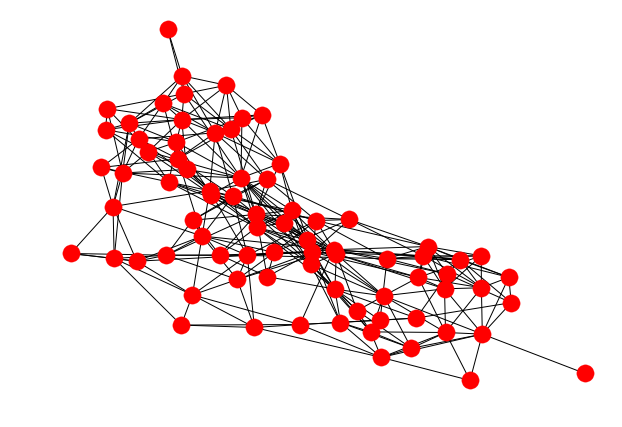

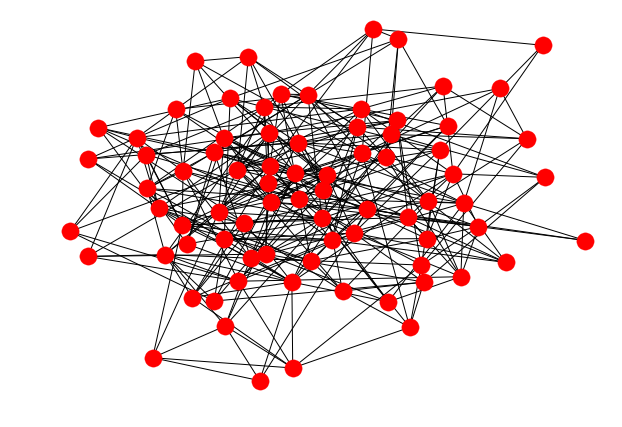

In [13]:
# draw Gong network and random network

Graph_gong = nx.from_numpy_matrix(net_gong_mat)
Graph_rand = nx.from_numpy_matrix(net_rand_mat)

plt.figure()
nx.draw(Graph_gong)
plt.show()

plt.figure()
nx.draw(Graph_rand)
plt.show()

**EXERCISE 3: Clustering coefficient **

The clustering coefficient ($C$) measures the local structure of a network, which can be calculated either for each node or the whole network. It is related to the number of a node's neighbours that are connected to each other.

• The clustering coefficient $C_i$ of node $i$ with degree $k_i$, can be defined as the ratio between the actual number of links between neighbours of $i\ (ln_i)$, and the maximum possible number of links between those neighbours:

$$ C_i = \frac{2 ln_i}{k_i(k_i - 1) }$$

• The clustering coefficient $C$ of whole network is the average of all individual clustering coefficients:

$$ C = \frac{1}{N}\sum_{i=1}^{N}{C_i }$$

• The clustering coefficient $C$ varies between 0 and 1. High $C$ means that neighboring nodes are well interconnected. This suggests redundancy in connections, which protects the network against random error, i.e. the loss of an individual node will have little impact on the structure of the network.

• Calculate the clustering coefficient $C$ for the human brain network and random network and compare the results.

• Confirm that your results are correct, by comparing it with a function from the networkx library, `nx.clustering()`.

In [0]:
# insert your code here
# Write a function that calculates clustering coefficient of a given network and a node

def clustering_coeff(net_mat, node_number):

In [0]:
# call the function and print the result (code #1)

net_gong_mat_cc = np.zeros(net_gong_mat_N)
for i in range(net_gong_mat_N):
    net_gong_mat_cc[i] = clustering_coeff(net_gong_mat, i)
net_gong_mat_cc_mean = np.mean(net_gong_mat_cc)
print('C of Gong network:',net_gong_mat_cc_mean)

net_rand_mat_cc = np.zeros(net_rand_mat_N)
for i in range(net_rand_mat_N):
    net_rand_mat_cc[i] = clustering_coeff(net_rand_mat, i)
net_rand_mat_cc_mean = np.mean(net_rand_mat_cc)
print('C of random network:',net_rand_mat_cc_mean)

In [0]:
# call the function and print the result (code #2: using nx.clustering() )
graph = nx.to_networkx_graph(net_gong_mat)
gong_cc = nx.clustering(graph) # dictionary where key = node
gong_cc = np.array([gong_cc[i] for i in range(len(gong_cc))])
print('C of Gong network:', np.mean(gong_cc))

graph = nx.to_networkx_graph(net_rand_mat)
rand_cc = nx.clustering(graph) # dictionary where key = node
rand_cc = np.array([rand_cc[i] for i in range(len(rand_cc))])
print('C of random network:', np.mean(rand_cc))

**EXPECTED OUTPUT**

```
C of Gong network: 0.4917967040853441
C of random network: 0.10466937955625738
```

**EXERCISE 4: Characteristic path length**

The characteristic path length ($L$) is a measure indicating how integrated a network is and how easily information can flow. Calculate the following for both the human network and the random network and compare.

• The path length or distance $d_{ij}$ between two nodes $i$ and $j$ is the smallest number of links that connect $i$ to $j$. The characteristic path length $L$ of a network is the average distance over all pairs of nodes:

$$ L = \frac{1}{N(N-1)} \sum_{j,k \in N, \ i\neq j} {d_{ij}} $$

• The efficiency ($E$) of a network quantifies the exchange of information across the whole network where information is concurrently exchanged. It is defined as the average of the inverse distance over all nodes of the network.

$$ E = \frac{1}{N(N-1)} \sum_{j,k \in N, \ i\neq j} {1/d_{ij}} \\$$

Comparing the above two measures between a given network of interest and a random network of the same size gives you an idea of how economically the network is constructed. 

• Write a code for a function calculating the distance matrix $d$ with $d_{ij}$ as its elements, given a connectivity matrix.

• Using the distance matrix, make a function for $L$ and $E$ for a given connectivity matrix.

• Hint: we can use the following useful property:


$$\\ 
\text{For connectivity matrix A}, {A^n}_{ij} \text{ is the number of paths of length $n$ from $i$ to $j$.}\\$$ 

Therefore, the smallest natural number $n$ such that the ${A^n}_{ij}$ becomes positive, gives you the distance $d_{i,j}$ between two nodes $i$ and $j$.

In [0]:
# Write your code
# calculate distance matrix from a given connectivity matrix

def cal_net_mat_distance(net_mat):
        
    return net_mat_d
        

In [0]:
# Write your code
# calculate characteristic path length and efficiency from a given distance matrix

def net_L_E(net_mat_d):

    
    return L, E

In [0]:
net_gong_mat_d = net_mat_distance(net_gong_mat)
L, E = net_L_E(net_gong_mat_d)

print('L:', L,'\t', 'E:', E)

**EXPECTED OUTPUT**
```
L: 2.8071928071928074 	 E: 0.431013431013431
```

** EXERCISE 5: Betweenness centrality **

The betweenness centrality ($b$) is a measure of centrality in a network, based on shortest paths. For every pair of nodes in a connected network, there exists at least one shortest path between the nodes such that the number of links that the path passes through is minimized.

The betweenness centrality for each node ($b_i$) is the number of the shortest paths that pass through the nodes:

$$ b_i = \sum_{j,k \in N, \ j\neq k} {\frac{n_{jk}(i)}{n_{jk}}} $$

where $n_{jk}$ is the number of the shortest paths between nodes $j$ and $k$, and $n_{jk}(i)$ is the number of these paths that go through node $i$. One can also define betweenness centraity for the network:

$$ b = \frac{1}{N} \sum_{i = 1}^{N} b_i $$

• Write a code for a function that calculates $b_i$ for a given connectivity matrix and a given node $i$, using the `networkx` library. The functions `nx.to_networkx_graph()` and `nx.betweenness_centrality()` can be useful.


• Calculate the betweenness centrality for the human brain network and random network and compare the value.


• Fi you have time, calculate the betweenness centrality for each node of human network and identify the areas with highest betweenness centrality (choose top 5 nodes). 

• What are the degrees and clustering coefficients ($k_i$ and $C_i$) of the nodes with high $b_i$?

• Repeat the calculation with the random network, and identify the characteristics of nodes with highest $b_i$ (choose top 5).

A node with high betweenness centrality would have more control over the network, because more information will pass through that node.


In [0]:
# calculates betweenness centrality from a given connectivity matrix

def calculate_bc(net_mat):
    net_mat = np.matrix(net_mat)
    graph = nx.to_networkx_graph(net_mat)
    bc = nx.betweenness_centrality(graph,normalized=False) # dictionary where key = node
    bc = np.array([bc[i] for i in range(len(bc))])
    return bc

In [0]:
net_gong_bc = calculate_bc(net_gong_mat)
net_gong_bc_mean = np.mean(net_gong_bc)
print('BC of Gong network:', net_gong_bc_mean)

net_rand_bc = calculate_bc(net_rand_mat)
net_rand_bc_mean = np.mean(net_rand_bc)
print('BC of random network:', net_rand_bc_mean)

**EXPECTED OUTPUT**


```
BC of Gong network: 69.57692307692308
BC of random network: 48.14102564102564
```



**EXERCISE 6: Comparison with other networks (optional, possible for mini project)**

Apparantly, the network characteristics of human brain network and random network are very different from each other. Repeat the comparison with macaque brain network data, and see if the macaque brain network exhibit similar properties compared with the human brain network.



**EXERCISE 7: Random networks (optional, possible for mini project)**


We can use random network model of Erdős–Rényi to generate random networks. 

An Erdős–Rényi network is constructed by connecting nodes randomly with probability $p$. An  Erdős–Rényi network $G(N, p)$ will have on average the following number of links:

$$l  = \binom{N}{2}p = \frac{N!}{2!(N-2)!}p .$$


In 1960, Erdős–Rényi showed that if the probability $p$ is above the following threshold, the graph $G(N,p)$ will almost surely be connected:


\begin{align} \text{if } p> \frac{\ln n}{n} &\text{, the the graph $G(N,p)$ is almost surely connected.} \\
\text{if } p< \frac{\ln n}{n} &\text{, the the graph $G(N,p)$ is almost surely disconnected.} \end{align}

• Construct a code generating random network $G$. One way of doing it is the following:


i) Give as the input: $N$ and $p$.

ii) Go through all the possible pairs of nodes of $G(N,p)$ with `for` loops.

iii) Generate a random number for each pair.

iv) Add the link of the specific pair to the connectivity list if the generated random number is lower than the value of $p$.


• With the same number of nodes and links as the human brain network, make a random network. For a fair compairson, one must first estimate $p$ from the data. Make sure that the resulting network  is connected. An easy way to do this is to run the code repeatedly until the output graph is connected. 

• Is the calculated $p$ larger than $(\ln n) / n $?
